In [453]:
%matplotlib notebook

In [454]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates

In [455]:
crimes_df = "Chicago_Crimes_Data.csv"

crimes_df = pd.read_csv(crimes_df, encoding="utf=8")

crimes_df

,ID,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
0,11614273,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
1,11622471,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
2,11255786,1/1/2017 0:00,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,False,2017,NaN,NaN
3,11259747,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
4,11267468,1/1/2017 0:00,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...
624511,12870310,9/24/2022 17:00,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
624512,12870245,9/24/2022 23:58,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
624513,12870060,9/26/2022 9:00,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727
624514,12841629,9/27/2022 21:30,330,ROBBERY,AGGRAVATED,False,2022,41.879408,-87.631432


In [456]:
crimes_df = crimes_df.set_index(["ID"])
crimes_df

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11614273,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
11622471,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
11255786,1/1/2017 0:00,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,False,2017,NaN,NaN
11259747,1/1/2017 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
11267468,1/1/2017 0:00,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
12870310,9/24/2022 17:00,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
12870245,9/24/2022 23:58,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
12870060,9/26/2022 9:00,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727


In [457]:
crimes_df.count()

Date            624516
IUCR            624516
Primary Type    624516
Description     624516
Arrest          624516
Year            624516
Latitude        621935
Longitude       621935
dtype: int64

In [458]:
crimes_df = crimes_df.dropna(how='any')

In [459]:
crimes_df.count()

Date            621935
IUCR            621935
Primary Type    621935
Description     621935
Arrest          621935
Year            621935
Latitude        621935
Longitude       621935
dtype: int64

In [460]:
crimes_df.dtypes

Date             object
IUCR             object
Primary Type     object
Description      object
Arrest             bool
Year              int64
Latitude        float64
Longitude       float64
dtype: object

In [461]:
crimes_df

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
10824428,1/1/2017 0:00,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,False,2017,41.808902,-87.599253
10827683,1/1/2017 0:00,810,THEFT,OVER $500,False,2017,41.979006,-87.906463
10801101,1/1/2017 0:00,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2017,41.759884,-87.597242
10801104,1/1/2017 0:00,486,BATTERY,DOMESTIC BATTERY SIMPLE,True,2017,41.774406,-87.635727
10801111,1/1/2017 0:00,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,True,2017,41.947226,-87.655523
...,...,...,...,...,...,...,...,...
12870310,9/24/2022 17:00,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
12870245,9/24/2022 23:58,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
12870060,9/26/2022 9:00,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727


In [462]:
crime_type = crimes_df["Primary Type"].unique()
crime_type


array(['DECEPTIVE PRACTICE', 'THEFT', 'CRIMINAL DAMAGE', 'BATTERY',
       'OTHER OFFENSE', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'OBSCENITY', 'CRIMINAL TRESPASS',
       'ASSAULT', 'SEX OFFENSE', 'MOTOR VEHICLE THEFT', 'INTIMIDATION',
       'ROBBERY', 'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL SEXUAL ASSAULT', 'PUBLIC PEACE VIOLATION', 'BURGLARY',
       'NARCOTICS', 'KIDNAPPING', 'ARSON', 'STALKING',
       'CONCEALED CARRY LICENSE VIOLATION', 'PROSTITUTION',
       'NON-CRIMINAL', 'LIQUOR LAW VIOLATION', 'PUBLIC INDECENCY',
       'HOMICIDE', 'GAMBLING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION'], dtype=object)

In [463]:
crime_type = len(crimes_df["Primary Type"].unique())
crime_type

33

In [464]:
crime_type = pd.value_counts(crimes_df["Primary Type"])
crime_type

THEFT                                148064
BATTERY                              117192
CRIMINAL DAMAGE                       67401
ASSAULT                               46975
DECEPTIVE PRACTICE                    42347
OTHER OFFENSE                         41121
NARCOTICS                             30093
BURGLARY                              28122
MOTOR VEHICLE THEFT                   24919
ROBBERY                               24072
CRIMINAL TRESPASS                     16417
WEAPONS VIOLATION                     12822
OFFENSE INVOLVING CHILDREN             4999
PUBLIC PEACE VIOLATION                 3500
CRIM SEXUAL ASSAULT                    3010
INTERFERENCE WITH PUBLIC OFFICER       2948
SEX OFFENSE                            2339
PROSTITUTION                           1672
ARSON                                   917
LIQUOR LAW VIOLATION                    529
STALKING                                471
KIDNAPPING                              434
GAMBLING                        

In [465]:
crimes_2017 = crimes_df[crimes_df["Year"] == 2017]
crimes_2017

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
10824428,1/1/2017 0:00,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,False,2017,41.808902,-87.599253
10827683,1/1/2017 0:00,810,THEFT,OVER $500,False,2017,41.979006,-87.906463
10801101,1/1/2017 0:00,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2017,41.759884,-87.597242
10801104,1/1/2017 0:00,486,BATTERY,DOMESTIC BATTERY SIMPLE,True,2017,41.774406,-87.635727
10801111,1/1/2017 0:00,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,True,2017,41.947226,-87.655523
...,...,...,...,...,...,...,...,...
11192239,12/31/2017 23:45,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2017,41.856427,-87.638893
11192254,12/31/2017 23:45,041A,BATTERY,AGGRAVATED: HANDGUN,False,2017,41.683369,-87.622830
11192540,12/31/2017 23:48,890,THEFT,FROM BUILDING,False,2017,41.895751,-87.623496


In [466]:
crime_2017 = pd.value_counts(crimes_2017["Primary Type"])
crime_2017

THEFT                                61746
BATTERY                              48002
CRIMINAL DAMAGE                      28697
ASSAULT                              18546
DECEPTIVE PRACTICE                   17653
OTHER OFFENSE                        16880
BURGLARY                             12662
ROBBERY                              11539
NARCOTICS                            11390
MOTOR VEHICLE THEFT                  11209
CRIMINAL TRESPASS                     6754
WEAPONS VIOLATION                     4662
OFFENSE INVOLVING CHILDREN            2065
PUBLIC PEACE VIOLATION                1486
CRIM SEXUAL ASSAULT                   1391
INTERFERENCE WITH PUBLIC OFFICER      1078
SEX OFFENSE                            908
PROSTITUTION                           729
ARSON                                  419
LIQUOR LAW VIOLATION                   191
KIDNAPPING                             188
GAMBLING                               187
STALKING                               179
INTIMIDATIO

In [467]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [61746, 48002, 28697]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="r", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2017")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")


#plt.savefig("Crimes of Chicago in 2017.png")

In [468]:
crimes_2018 = crimes_df.loc[crimes_df["Year"] == 2018]
crimes_2018

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11196173,1/1/2018 0:00,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,False,2018,41.756325,-87.709916
11198738,1/1/2018 0:00,820,THEFT,$500 AND UNDER,False,2018,41.881777,-87.620768
11212228,1/1/2018 0:00,810,THEFT,OVER $500,False,2018,41.695227,-87.642468
11220328,1/1/2018 0:00,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,True,2018,41.950778,-87.716502
11220367,1/1/2018 0:00,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,False,2018,41.816857,-87.690789
...,...,...,...,...,...,...,...,...
11552731,12/31/2018 23:55,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2018,41.751914,-87.647717
11552724,12/31/2018 23:56,440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,True,2018,41.857068,-87.657625
11552699,12/31/2018 23:57,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2018,41.740521,-87.647391


In [469]:
crime_2018 = pd.value_counts(crimes_2018["Primary Type"])
crime_2018

THEFT                                62467
BATTERY                              48545
CRIMINAL DAMAGE                      27463
ASSAULT                              19742
DECEPTIVE PRACTICE                   17746
OTHER OFFENSE                        16821
NARCOTICS                            12715
BURGLARY                             11430
MOTOR VEHICLE THEFT                   9832
ROBBERY                               9358
CRIMINAL TRESPASS                     6824
WEAPONS VIOLATION                     5409
OFFENSE INVOLVING CHILDREN            2028
PUBLIC PEACE VIOLATION                1352
INTERFERENCE WITH PUBLIC OFFICER      1298
CRIM SEXUAL ASSAULT                   1280
SEX OFFENSE                            999
PROSTITUTION                           715
ARSON                                  351
LIQUOR LAW VIOLATION                   265
GAMBLING                               198
STALKING                               196
KIDNAPPING                             170
INTIMIDATIO

In [470]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [62467, 48545, 27463]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="g", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2018")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2018.png")

In [471]:
crimes_2019 = crimes_df[crimes_df["Year"] == 2019]
crimes_2019

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11552667,1/1/2019 0:00,890,THEFT,FROM BUILDING,False,2019,41.889453,-87.627995
11552674,1/1/2019 0:00,910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2019,41.726566,-87.636066
11552709,1/1/2019 0:00,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2019,41.812780,-87.691894
11552758,1/1/2019 0:00,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2019,41.778565,-87.665464
11553168,1/1/2019 0:00,890,THEFT,FROM BUILDING,False,2019,41.898768,-87.624116
...,...,...,...,...,...,...,...,...
12006739,12/26/2019 10:59,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,True,2019,41.875812,-87.750410
12007706,12/27/2019 10:56,2014,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),True,2019,41.878588,-87.745876
12006723,12/27/2019 12:00,2024,NARCOTICS,POSSESS - HEROIN (WHITE),True,2019,41.860110,-87.726214


In [472]:
crime_2019 = pd.value_counts(crimes_2019["Primary Type"])
crime_2019

THEFT                                22087
BATTERY                              18599
CRIMINAL DAMAGE                      10020
ASSAULT                               7827
OTHER OFFENSE                         6857
DECEPTIVE PRACTICE                    6290
NARCOTICS                             5743
BURGLARY                              3480
MOTOR VEHICLE THEFT                   3455
ROBBERY                               2798
CRIMINAL TRESPASS                     2684
WEAPONS VIOLATION                     2368
OFFENSE INVOLVING CHILDREN             833
PUBLIC PEACE VIOLATION                 626
INTERFERENCE WITH PUBLIC OFFICER       551
SEX OFFENSE                            382
CRIM SEXUAL ASSAULT                    339
PROSTITUTION                           228
ARSON                                  128
STALKING                                83
CONCEALED CARRY LICENSE VIOLATION       75
LIQUOR LAW VIOLATION                    71
KIDNAPPING                              69
INTIMIDATIO

In [473]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [22087, 18599, 10020]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="orange", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2019")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2019.png")

In [474]:
crimes_2020 = crimes_df[crimes_df["Year"] == 2020]
crimes_2020

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
12016034,1/1/2020 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2020,41.915306,-87.686639
12220321,1/1/2020 0:00,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,False,2020,41.728192,-87.600985
12013828,1/1/2020 0:00,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,False,2020,41.812274,-87.748177
12019692,1/1/2020 0:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2020,41.940222,-87.669039
12016436,1/1/2020 7:00,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,2020,41.795247,-87.643584
...,...,...,...,...,...,...,...,...
12244533,12/13/2020 23:40,910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2020,41.747732,-87.596278
12244538,12/13/2020 23:40,430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,False,2020,41.734762,-87.670552
12244522,12/13/2020 23:40,291,CRIMINAL SEXUAL ASSAULT,ATTEMPT NON-AGGRAVATED,False,2020,41.772285,-87.625115


In [475]:
crime_2020 = pd.value_counts(crimes_2020["Primary Type"])
crime_2020

BATTERY                              1727
THEFT                                1455
CRIMINAL DAMAGE                      1003
ASSAULT                               716
DECEPTIVE PRACTICE                    545
BURGLARY                              508
OTHER OFFENSE                         468
MOTOR VEHICLE THEFT                   365
ROBBERY                               326
WEAPONS VIOLATION                     306
NARCOTICS                             218
CRIMINAL TRESPASS                     136
OFFENSE INVOLVING CHILDREN             54
SEX OFFENSE                            41
CRIMINAL SEXUAL ASSAULT                33
PUBLIC PEACE VIOLATION                 30
INTERFERENCE WITH PUBLIC OFFICER       20
ARSON                                  12
STALKING                               11
KIDNAPPING                              6
INTIMIDATION                            6
CONCEALED CARRY LICENSE VIOLATION       3
LIQUOR LAW VIOLATION                    2
GAMBLING                          

In [476]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [1727, 1455, 1003]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="pink", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2020")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2020.png")

In [477]:
crimes_2021 = crimes_df[crimes_df["Year"] == 2021]
crimes_2021

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
12345411,1/1/2021 0:00,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2021,41.827682,-87.665496
12449065,1/1/2021 0:00,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,False,2021,41.712933,-87.536489
12346533,1/5/2021 0:00,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,False,2021,41.729448,-87.563365
12265790,1/9/2021 15:59,1020,ARSON,BY FIRE,True,2021,41.973401,-87.672166
12346662,1/12/2021 10:15,810,THEFT,OVER $500,False,2021,41.851989,-87.689219
...,...,...,...,...,...,...,...,...
12541107,11/14/2021 22:45,560,ASSAULT,SIMPLE,False,2021,42.015416,-87.664883
12541124,11/14/2021 22:46,031A,ROBBERY,ARMED - HANDGUN,False,2021,41.855887,-87.672034
12541099,11/14/2021 22:58,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,True,2021,41.886320,-87.750388


In [478]:
crime_2021 = pd.value_counts(crimes_2021["Primary Type"])
crime_2021

BATTERY                              316
THEFT                                301
CRIMINAL DAMAGE                      214
ASSAULT                              143
DECEPTIVE PRACTICE                   103
OTHER OFFENSE                         92
WEAPONS VIOLATION                     77
MOTOR VEHICLE THEFT                   56
ROBBERY                               49
BURGLARY                              39
NARCOTICS                             27
CRIMINAL TRESPASS                     19
CRIMINAL SEXUAL ASSAULT               17
OFFENSE INVOLVING CHILDREN            17
SEX OFFENSE                            7
ARSON                                  6
PUBLIC PEACE VIOLATION                 6
INTIMIDATION                           3
STALKING                               2
KIDNAPPING                             1
CONCEALED CARRY LICENSE VIOLATION      1
OBSCENITY                              1
Name: Primary Type, dtype: int64

In [479]:
#crimes = ["THEFT", "BATTERY", "CRIMINAL DAMAGE"]
#number_crimes = [316, 301, 214]
#x_axis = np.arange(len(number_crimes))

#plt.bar(x_axis, number_crimes, color="purple", align="center")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, crimes)

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.title("Crimes of Chicago in 2021")
#plt.xlabel("Crimes")
#plt.ylabel("Number of Crimes")

#plt.savefig("Crimes of Chicago in 2021.png")

In [480]:
x_axis = [1, 2, 3, 4, 5]
labels = ["2017", "2018", "2019", "2020", "2021"]

In [481]:
theft = [61746, 62467, 22087, 1727, 316]
battery_crimes = [48002, 48545, 18599, 1455, 301]
criminal_damage = [28697, 27463, 10020, 1003, 214]

<IPython.core.display.Javascript object>


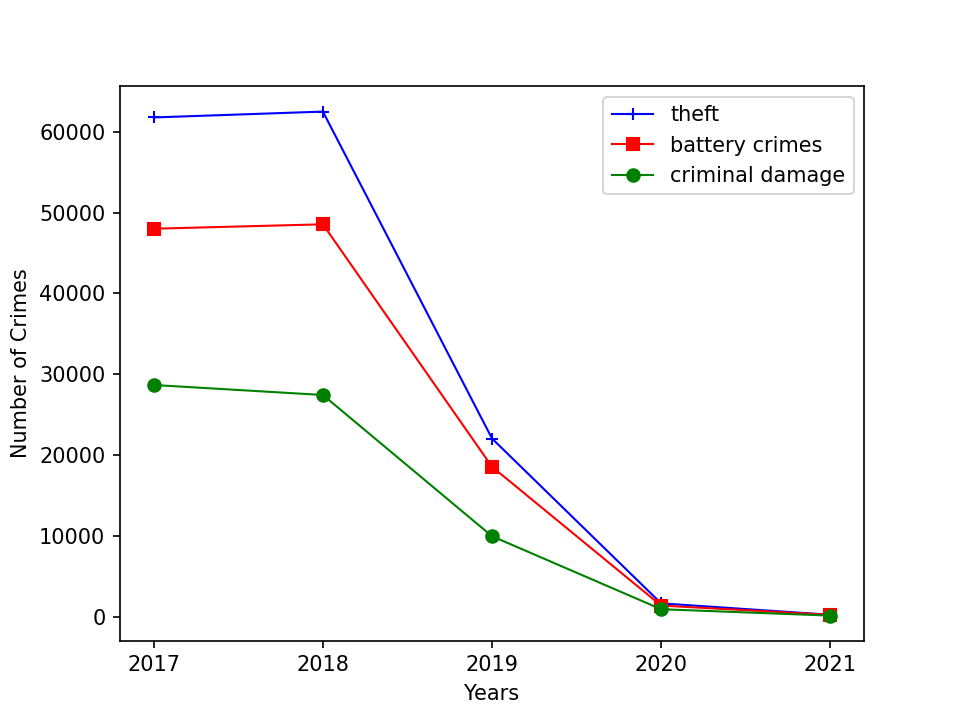

In [482]:
theft, = plt.plot(x_axis, theft, marker="+",color="blue", linewidth=1, label="theft")
battery_crimes, = plt.plot(x_axis, battery_crimes, marker="s", color="red", linewidth=1, label="battery crimes")
criminal_damage, = plt.plot(x_axis, criminal_damage, marker="o",color="green", linewidth=1, label="criminal damage")

plt.legend(handles=[theft, battery_crimes, criminal_damage], loc="best")

plt.xlabel("Years")
plt.ylabel("Number of Crimes")

plt.xticks(x_axis, labels)

plt.savefig("Crimes of Chicago Between 2017-2021.png")

In [486]:
top_3 = pd.DataFrame({
    "Year": [2017, 2017, 2107, 2018, 2018, 2018, 2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021],
    "Crime Type": ["Theft", "Battery Crimes", "Criminal Damage", "Theft", "Battery Crimes", "Criminal Damage", "Theft", "Battery Crimes", "Criminal Damage", "Theft", "Battery Crimes", "Criminal Damage", "Theft", "Battery Crimes", "Criminal Damage"],
    "Crime Total": [61746, 48002, 28697, 62467, 48545, 27463, 22087, 18599, 10020, 1727, 1455, 1003, 316, 301, 214]
})

top_3

,Year,Crime Type,Crime Total
0,2017,Theft,61746
1,2017,Battery Crimes,48002
2,2107,Criminal Damage,28697
3,2018,Theft,62467
4,2018,Battery Crimes,48545
5,2018,Criminal Damage,27463
6,2019,Theft,22087
7,2019,Battery Crimes,18599
8,2019,Criminal Damage,10020
9,2020,Theft,1727


In [487]:
top_3 = top_3.set_index(["Year"])
top_3

,Crime Type,Crime Total
Year,,
2017,Theft,61746
2017,Battery Crimes,48002
2107,Criminal Damage,28697
2018,Theft,62467
2018,Battery Crimes,48545
2018,Criminal Damage,27463
2019,Theft,22087
2019,Battery Crimes,18599
2019,Criminal Damage,10020


In [492]:
top_3["Crime Total"] = top_3["Crime Total"].map("{:,}".format)

top_3

,Crime Type,Crime Total
Year,,
2017,Theft,"61,746"
2017,Battery Crimes,"48,002"
2107,Criminal Damage,"28,697"
2018,Theft,"62,467"
2018,Battery Crimes,"48,545"
2018,Criminal Damage,"27,463"
2019,Theft,"22,087"
2019,Battery Crimes,"18,599"
2019,Criminal Damage,"10,020"


In [493]:
theft_trend = top_3[top_3["Crime Type"] == "Theft"]
theft_trend

,Crime Type,Crime Total
Year,,
2017,Theft,"61,746"
2018,Theft,"62,467"
2019,Theft,"22,087"
2020,Theft,"1,727"
2021,Theft,316


In [494]:
battery_trend = top_3[top_3["Crime Type"] == "Battery Crimes"]
battery_trend

,Crime Type,Crime Total
Year,,
2017,Battery Crimes,"48,002"
2018,Battery Crimes,"48,545"
2019,Battery Crimes,"18,599"
2020,Battery Crimes,"1,455"
2021,Battery Crimes,301


In [495]:
criminal_trend = top_3[top_3["Crime Type"] == "Criminal Damage"]
criminal_trend

,Crime Type,Crime Total
Year,,
2107,Criminal Damage,"28,697"
2018,Criminal Damage,"27,463"
2019,Criminal Damage,"10,020"
2020,Criminal Damage,"1,003"
2021,Criminal Damage,214
